In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


from mpl_toolkits import mplot3d
import matplotlib.colors


In [5]:
def sigmoid(x,w,b):
    return 1/(1+np.exp(-(w*x+b)))

In [7]:
sigmoid(1,0.5,0)

0.6224593312018546

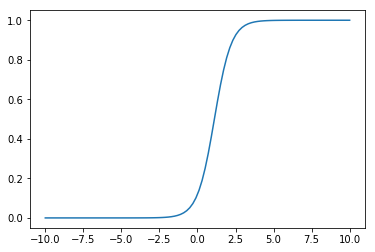

In [9]:
w=1.8
b=-2
X=np.linspace(-10,10,100)
Y=sigmoid(X,w,b)


plt.plot(X,Y)
plt.show()

In [11]:
def sigmoid_2d(x1,x2,w1,w2,b):
    return 1/(1+np.exp(-(w1*x1+w2*x2+b))) 

In [12]:
sigmoid_2d(1,0,0.5,0,0)

0.6224593312018546

In [36]:
X1=np.linspace(-10,10,100)
X2=np.linspace(-10,10,100)

XX1,XX2=np.meshgrid(X1,X2)

print(X1.shape,XX1.shape,X2.shape,XX2.shape)

(100,) (100, 100) (100,) (100, 100)


In [37]:
w1=2
w2=0.5
b=0
Y=sigmoid_2d(XX1,XX2,w1,w2,b)

In [38]:
my_cmap=matplotlib.colors.LinearSegmentedColormap.from(**,["red","yellow","green"])

SyntaxError: invalid syntax (<ipython-input-38-39a00b96deb8>, line 1)

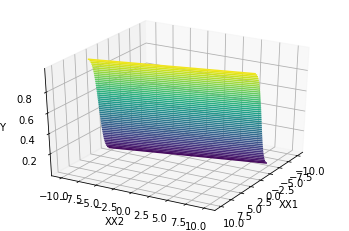

In [18]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(XX1,XX2,Y,50, cmap='viridis')
ax.set_xlabel('XX1')
ax.set_ylabel('XX2')
ax.set_zlabel('Y');

ax.view_init(30, 30)

In [19]:
w_unknown=0.5
b_unknown=0.25

X=np.random.random(25)*20-10
Y=sigmoid(X,w_unknown,b_unknown)

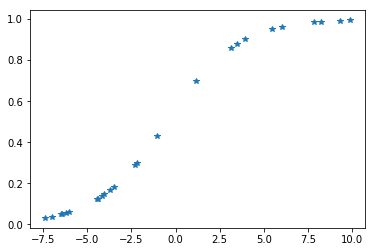

In [20]:
plt.plot(X,Y,'*')
plt.show()

In [23]:
def calc_loss(X,Y,w_est,b_est):
    loss=0
    for x,y in zip(X,Y):
        loss+=(y-sigmoid(x,w_est,b_est))**2
        return loss

In [34]:
W=np.linspace(0,2,101)
B=np.linspace(-1,1,101)

WW,BB=np.meshgrid(W,B)

Loss=np.zeros(WW.shape)

In [35]:
for i in range(WW.shape[0]):
    for j in range(WW.shape[1]):
       Loss[i,j]=calc_loss(X,Y,WW[i,j],BB[i,j])

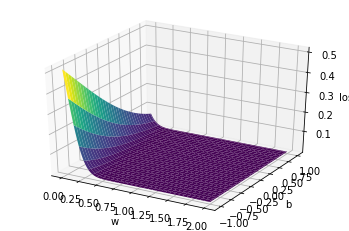

In [31]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.plot_surface(WW,BB,Loss, cmap='viridis')
ax.set_xlabel('w')
ax.set_ylabel('b')
ax.set_zlabel('loss');



In [40]:
ij=np.argmin(Loss)

In [41]:
ij

3967

In [42]:
i=int(np.floor(ij/Loss.shape[1]))

In [43]:
j=int (ij-i*Loss.shape[1])

In [44]:
print(ij,i,j)

3967 39 28


In [46]:
print(WW[i,j],BB[i,j])

0.56 -0.21999999999999997


In [ ]:
#Sigmoid Class


In [51]:
class SigmoidNeuron:
    
    def _init_(self):
        self.w=None
        self.b=None
        
    def perceptron(self,x):
        return np.dot(x,self.w.T)+self.b
    
    def sigmoid(self,x):
        return 1.0/(1.0+np.exp(-x))
    
    def grad_w(self,x,y):
        y_pres=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)*x
    
    def grad_b(self,x,y):
        y_pres=self.sigmoid(self.perceptron(x))
        return (y_pred-y)*y_pred*(1-y_pred)
    
    def fit(self,X,Y,epochs=1,learning_rate=1,initialise=True):
        if initialise:
            self.w=np.random.randn(1,X.shape[1])
            self.b=0
            
        for i in range(epochs):
            dw=0
            db=0
            for x,y in zip(X,Y):
                dw+=self.grad_w(x,y)
                db+=self.grad_b(x,y)
                
            self.w=learning_rate*dw
            self.b=learning_rate*db
    

In [53]:
X=np.asarray([[2.5,2.5],[4,-1],[1,-4],[-3,1.25],[-2,-4],[1,5]])
Y=[1,1,1,0,0,0]

In [54]:
sn=SigmoidNeuron()

In [55]:
sn.fit(X,Y,1,0.25,True)

NameError: name 'y_pred' is not defined

In [56]:
def plot_sn(X,Y,sn,ax):
    X1=np.linspace(-10,10,100)
    X2=np.linspace(-10,10,100)
    XX1,XX2=np.meshgrid(X1,X2)
    YY=np.zeros(XX1.shape)
    for i in range (X2.size):
        for j in range (X2.size):
            val=np.asarray([X1[j],X2[i]])
            YY[i,j]=sn.sigmoid(sn.perceptron(val))
        ax.contour(XX1,XX2,YY,cmap=my_cmap,alpha=0.6)
        ax.scatter(X[:,0],X[:,1],c=Y,cmap=my_cmap)
        ax.plot()

In [ ]:
sn.fit(X,Y,1,0.05,True)
N=30
plt.figure(figsize=(10,N*5))
for i in range (N):
    print(sn.w,sn.b)